In [22]:
import os
import numpy as np
import pandas as pd
import scipy.optimize
import matplotlib.pyplot as plt
import tensorflow as ts
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 

In [23]:
os.chdir("/Users/MauriceLubetzki/Documents/Etats-Unis/SAIL/HaoDeng/13063_2006_152_MOESM1_ESM")

In [24]:
df = pd.read_csv("Data-Table.csv")

In [25]:
df.head()

,id,age,sex,migraine,chronicity,acupuncturist,date_randomized,practice_id,group,pk1,...,p5cacu,p5all,p5dos,totalacu,totalother,totalgp,totalspec,totaldos,exposure,exposuredos
0,100,47,1,1,35,12,24/03/2000,35,1,10.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,101,52,1,1,8,12,24/03/2000,35,0,9.50,...,NaN,NaN,NaN,0.0,2.0,4.0,0.0,6.0,3.0,3.0
2,104,32,1,1,14,12,13/04/2000,35,0,16.00,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,3.0,3.0
3,105,53,1,1,10,9,5/4/00,25,0,32.50,...,NaN,NaN,NaN,0.0,2.0,0.0,0.0,NaN,3.0,NaN
4,108,56,1,1,40,9,24/03/2000,25,0,16.50,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,23.0,12.0,12.0


In [26]:
def data_loader():
    
    Data =np.asarray(df)
    Y=Data[:,3]
    X=Data[:,9:20]
    X =np.asarray(X,dtype=np.float64)
    X =np.nan_to_num(X)#Nan to Zeros

    X_Train=X[0:int(0.7*X.shape[0]),:]
    Y_Train = Y[0:int(0.7 * Y.shape[0])]

    X_Test = X[int(0.7 * X.shape[0]):X.shape[0], :]
    Y_Test = Y[int(0.7 * Y.shape[0]):X.shape[0]]

    return(X_Train,Y_Train,X_Test,Y_Test)

In [85]:
X_Train, Y_Train, X_Test, Y_Test=data_loader()
X_Train.shape
theta = np.zeros(X_Train.shape[1])
theta.shape

(11,)

In [120]:
class LogisticRegression:
    
    def __init__(self, lbd = 0, lr=0.01, num_iter=100000, fit_intercept=True):
        self.lbd = lbd 
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
    
    def __add_intercept(self, X): # add intercept 
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z)+0.001)
    
    def __loss(self, h, y):
        return (- y*np.log(h) - (1 - y)*(np.log(1 - h))).mean() +\
    self.lbd*0.5*np.asarray(self.theta).dot(np.asarray(self.theta.T)) 
        
    
    def __loss_DP2(self, h, y):
        self.theta = np.asarray(self.theta)
        return ( ((1 - y) * np.log(1 - h)) + \
    (self.b.T.dot(self.theta))/y.size \
    +self.lbd*self.tetha.dot(self.theta.T))
    
    def fit(self, X, y):
        if self.fit_intercept: #we make a condition on the input of the class 
            X = self.__add_intercept(X)
        # weights initialization
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.array(np.dot(X, self.theta),dtype=np.float32)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size + (self.lbd*self.theta)/ y.size
            self.theta = self.theta - self.lr * gradient
    
        
    def fit_DP_Alg1(self,X, y,eps): 
        n = X.shape[0]
        norm_etha = np.random.gamma(11, 2/(n*eps*self.lbd),1)
        noise = np.random.laplace(0, 2/(n*eps*self.lbd*abs(norm_etha)),self.theta.shape)
        
        self.theta = self.theta + noise
        

    def fit_DP_Alg2(self, X, y,eps):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # weights initialization
        self.theta = np.zeros(X.shape[1])
        
        n = X.shape[0]
        norm_b = np.random.gamma(11, 2/(eps),1)
        self.b = np.random.laplace(0, 2/(eps*abs(norm_b)),self.theta.shape)
        
        for i in range(self.num_iter):
                                  
            z = np.array(np.dot(X, self.theta),dtype = float)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size + (self.lbd*self.theta)/ y.size + self.b /y.size
            self.theta = self.theta - self.lr * gradient    
    
    def predict_prob(self, X):
        return self.__sigmoid(np.array(np.dot(X, self.theta[0:-1]),dtype = float) + np.array(self.theta[-1]))
    
    def predict(self, X, threshold):
        Y = []
        for i in X: 
            #print(self.predict_prob(i))
            if self.predict_prob(i) >= threshold: 
                Y.append(1)
            else: 
                Y.append(0)
        return Y
    
    def loss(self,X_Train, Y_Train, X_Test, Y_Test):
        
        if self.fit_intercept:
            X_Train = self.__add_intercept(X_Train)
            X_Test = self.__add_intercept(X_Test)
        
        z_train = np.array(np.dot(X_Train, self.theta),dtype=np.float32)
        h_train = self.__sigmoid(z_train)
        
        z_test = np.array(np.dot(X_Test, self.theta),dtype=np.float32)
        h_test = self.__sigmoid(z_test)
    
        a = self.__loss(h_train,Y_Train) 
        b = self.__loss(h_test,Y_Test) 
        
        return(a,b)

In [125]:
model = LogisticRegression(lbd = 10, lr=0.01, num_iter=10000)
%time model.fit(X_Train,Y_Train)
model.fit_DP_Alg1(X_Train,Y_Train,0.5)

CPU times: user 4.43 s, sys: 54.1 ms, total: 4.48 s
Wall time: 4.61 s


In [127]:
for j in range(1000,1000001,1000):
    
    Loss_Train = []
    Loss_Test = []
    
    model = LogisticRegression(lbd = 10, lr=0.01, num_iter=j)
    model.fit(X_Train,Y_Train)
    a , b = model.loss(X_Train, Y_Train, X_Test, Y_Test) 
    
    Loss_Train.append(a)
    Loss_Test.append(b)

KeyboardInterrupt: 

In [ ]:
num_iter = [j for j in range(1000,1000001,1000)]
plt.plot(num_iter,Loss_Train,'r',num_iter,Loss_Test,'b')

In [8]:
def F1_score(Predict,Y_Test):
    P = np.sum(Predict[Y_Test==1] == Y_Test[Y_Test==1]) / (np.sum(Predict[Y_Test==1] == Y_Test[Y_Test==1]) +\
                                                     np.sum(Predict[Y_Test == 0])) # False positive
    R = np.sum(Predict[Y_Test==1] == Y_Test[Y_Test==1]) / (np.sum(Predict[Y_Test==1] == Y_Test[Y_Test==1]) +\
                                                     np.sum(Y_Test[Predict==0])) # False negative
    
    return((2*P*R)/(P+R))

In [9]:
model = LogisticRegression(lbd = 10, lr=0.01, num_iter=200000)

In [10]:
%time model.fit(X_Train, Y_Train)
print()

CPU times: user 1min 23s, sys: 666 ms, total: 1min 24s
Wall time: 1min 25s


In [48]:
L = []
L_DP = [] 
Lambda = np.linspace(1,100,10)

Text(0, 0.5, '# of experiments')

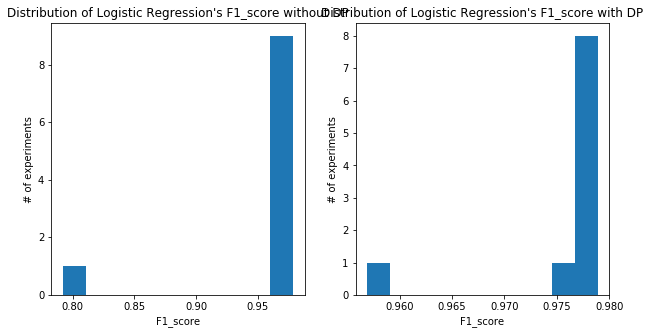

In [49]:
for i in Lambda: 
    model = LogisticRegression(lbd = i, lr=0.1, num_iter=80000)
    
    model.fit(X_Train, Y_Train)
    preds = model.predict(X_Test,0.5)
    L.append(F1_score(np.asarray(preds).flatten(),Y_Test))
    
    model.fit_DP_Alg1(X_Train,Y_Train,eps =0.5)
    preds = model.predict(X_Test,0.5)
    L_DP.append(F1_score(np.asarray(preds).flatten(),Y_Test))

fig = plt.figure(figsize =(10,5))
fig.add_subplot(1,2,1)
plt.hist(L)
plt.title("Distribution of Logistic Regression's F1_score without DP")
plt.xlabel('F1_score')
plt.ylabel('# of experiments')
fig.add_subplot(1,2,2)
plt.hist(L_DP)
plt.title("Distribution of Logistic Regression's F1_score with DP")
plt.xlabel('F1_score')
plt.ylabel('# of experiments')

In [54]:
L_DP2 = []
for i in Lambda: 
    model = LogisticRegression(lbd = i, lr=0.1, num_iter=80000)
    model.fit_DP_Alg2(X_Train,Y_Train,eps =0.5)
    preds = model.predict(X_Test,0.5)
    L_DP2.append(F1_score(np.asarray(preds).flatten(),Y_Test))

Text(0, 0.5, '# of experiments')

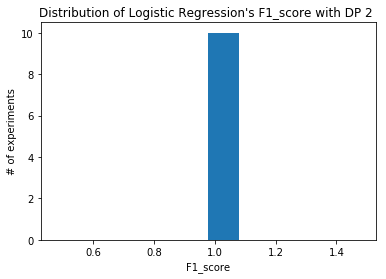

In [55]:
plt.hist(L_DP2)
plt.title("Distribution of Logistic Regression's F1_score with DP 2 ")
plt.xlabel('F1_score')
plt.ylabel('# of experiments')

Text(0, 0.5, 'F1_score')

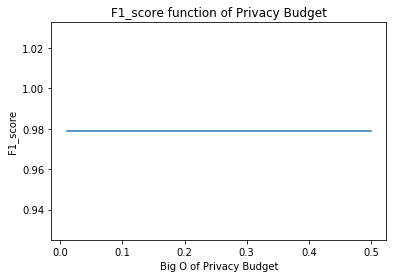

In [59]:
eps = np.linspace(0.5,0.01,10)
M = []
for i in eps: 
    model = LogisticRegression(lbd = 1, lr=0.1, num_iter=100000)
    model.fit(X_Train, Y_Train)
    model.fit_DP_Alg1(X_Train,Y_Train,eps =i)
    preds = model.predict(X_Test,0.5)
    M.append(F1_score(np.asarray(preds).flatten(),Y_Test))
    
plt.plot(eps,M)
plt.title('F1_score function of Privacy Budget')
plt.xlabel('Big O of Privacy Budget')
plt.ylabel('F1_score')